알겠습니다. 설계한 페르소나와 프로세스에 맞춰 **[난이도: 하]** 수준의 테스트 시뮬레이션을 시작합니다.

당신은 데이터 분석가로서 아래 상황에 직면했습니다. 제시된 데이터와 시나리오를 분석하여 답변해 주십시오.

---

**[시나리오]**
당신이 관리하는 카페의 점장님으로부터 다음과 같은 요청이 들어왔습니다.
"이번 달에 가장 효자 상품이 무엇인지 파악해서 다음 달 메인 배너로 걸고 싶어요. 메뉴별로 **총 매출액(많이 판 금액 순)**이 높은 순서대로 한눈에 비교할 수 있게 그래프를 그려주세요."

**[질문]**

1. 이 상황에서 해결해야 할 **핵심 질문**은 무엇이며, 데이터에서 **어떤 변수(컬럼)**들을 조합하여 새로운 지표를 만들어야 합니까?
2. 점장님의 요청(매출액 높은 순 비교)을 시각화하기에 가장 적합한 **차트**는 무엇입니까?
3. 그래프를 그리기 직전까지 수행해야 할 **데이터 전처리 및 가공 과정**을 논리적인 순서대로(Step-by-step) 설명하십시오.

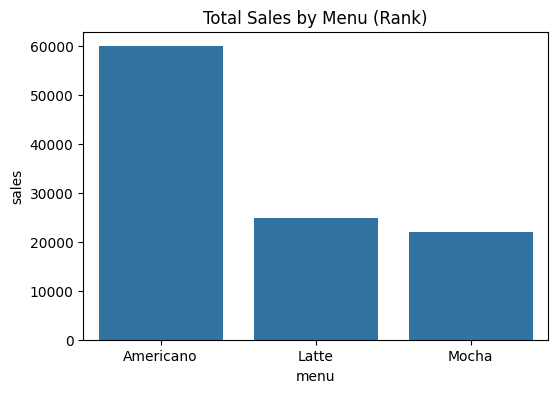

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = [
    {"date": "2024-03-01", "menu": "Americano", "price": "4000", "qty": 5},
    {"date": "2024-03-01", "menu": "Latte",     "price": "5000원", "qty": "3"},
    {"date": "2024-03-02", "menu": "Americano", "price": 4000,   "qty": None}, # 기록 누락
    {"date": "2024-03-02", "menu": "Mocha",     "price": "5500", "qty": 4},
    {"date": "2024-03-03", "menu": "Latte",     "price": "5000", "qty": 2},
    {"date": "2024-03-03", "menu": "Americano", "price": "4000", "qty": 10},
]
df=pd.DataFrame(raw_data)

df["price"] = (
    df["price"]
    .astype(str)
    .str.replace("원","")
)
df["price"] = pd.to_numeric(df["price"], errors='coerce')

df["qty"] = pd.to_numeric(df["qty"], errors='coerce')

df = df.dropna(subset=["price", "qty"])

df["sales"] = df["price"] * df["qty"]

df

menu_sales = (
    df.groupby("menu", as_index=False)["sales"]
    .sum()
    .sort_values("sales", ascending=False)
)

# 5. 시각화 (Seaborn Barplot)
plt.figure(figsize=(6, 4))
sns.barplot(data=menu_sales, x="menu", y="sales")
plt.title("Total Sales by Menu (Rank)") # 제목 달기 [cite: 174, 222]
plt.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    6 non-null      object
 1   menu    6 non-null      object
 2   price   6 non-null      int64 
 3   qty     5 non-null      object
dtypes: int64(1), object(3)
memory usage: 324.0+ bytes
